## The normal distribution and "expectedness"

The Normal (or Gaussian) distribution describes the probability of a continuous random variable.
This is the (likely familiar) bell curve. 

### Definition
The Normal distribution has two parameters: the mean ($\mu$) and the standard deviation ($\sigma$). 
The pdf is symmetric and unimodel and defined over all values from negative infinity to positive infinity. 
Values close to the mean are much, much more likely that values further from the mean. 
Because of this, the Normal distribution describes phenomena or values of a r.v. that are more or less expected to be close to $\mu$---surprises are not very likely. 

\begin{align}
    f(x) &= \frac{1}{\sqrt{2\pi} \sigma} e^{ - \frac{(x-\mu)^{2}}{2\sigma}  }\\
         &= \frac{1}{\sqrt{2\pi \sigma^{2} } } \exp \left\{ - \frac{(x-\mu)^{2}}{2\sigma}  \right\} \\
         &= \left( 2\pi \sigma^{2} \right)^{-1/2} \exp \left\{ -\frac{1}{2} \left(\frac{x-\mu}{\sigma}\right)^{2}  \right\}
\end{align}

### Expectation and variance

If $X$ is a r.v. and normally distributed $X \sim \mathcal{N}\left( \mu, \sigma^{2}\right)$,
the expectation is 

\begin{align}
    E(x) = \mu
\end{align}

and variance is 

\begin{align}
    Var(x) = \sigma^{2}
\end{align}

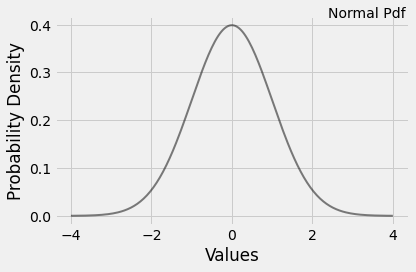

In [2]:
from scipy import stats

Pdf = stats.norm(0,1).pdf # first number is  mean and seoncd number is std dev
domain = np.linspace(-4,4,200) # 200 points linearly spaced between -3 and 3

plt.style.use("fivethirtyeight")
fig,ax = plt.subplots()

ax.plot(domain,Pdf(domain) ,'k-',lw=2,alpha=0.5)

ax.set_xlabel("Values")
ax.set_ylabel("Probability Density")

ax.text(0.99,0.99,"Normal Pdf",fontsize=14,transform=ax.transAxes,ha='right')

fig.set_tight_layout(True)
plt.show()

### The expectedness of Normal distributions

The normal distribution's pdf is a decreasing exponential of a squared quantity. 
We know exponentials increase and decrease fast, and squaring the term inside the exp means they grow or shrink even fast. 
Because of this, high probabilities are assigned to intervals close to the mean. 
In some sense, a r.v. with a normal distribution assumes data are more or less expected to be near the mean. 

To be more precise, a 0.68 probability is assigned to the interval within one standard deviation of the mean, 0.95 probability within 2 standard deviations and 0.997 within three standard deviations:

* $p[ (\mu - \sigma, \mu + \sigma) ]   = 0.68$
* $p[ (\mu - 2\sigma, \mu + 2\sigma) ] = 0.95$
* $p[ (\mu - 3\sigma, \mu + 3\sigma) ] = 0.997$


It is important to keep in mind that a normal distribution characterizes values expected to be close to their mean---most values will fall within 2 standard deviations.

### Z scores and "standardizing"

The normal distribution also plays a role in "standardizing" data. 
We can standardize a variable $X$ with the following algorithm:
1. Compute the mean of X
2. Compute the standard deviation of X
3. For each value in X
    1. subtract the mean
    2. divide the value in 3.1. by the standard deviation


By standardizing, the values of $X$ are put in terms of units of standard deviation. 
A value of $0$ mean the value is the same as the mean of the data.
A value of $1$ is one standard deviation larger than the mean and so on. 

Standardizing is important when you want to compare two variables that have different units, or that have different variances around their mean. 


## The Poisson distribution and incidence 

### Definition

A random variable $X$ has a Poisson distribution---$X\sim \text{Pois}\left( \lambda \right)$--- if it is discrete and it's probability mass function is 

\begin{align}
    p(X = k) = e^{-\lambda} \frac{ \lambda^{k} }{ k! }
\end{align}

A Poisson distributed random variable assigns probabilities to the number of events that occur over a specific time period. The parameter $\lambda$ is typically thought of as the rate of events per unit of time. For example, the number of deaths per month, number of phone calls per week, or number of emails per hour (so many). 

### Expected value and variance

The expected value is 

\begin{align}
    \text{E}(X) = \lambda
\end{align}

and the variance is 

\begin{align}
    \text{Var}(X) = \lambda
\end{align}

### Two major assumptions

The biggest assumption a Poisson random variable makes is that the expected number of events over a length of time $t$ is equal to $\lambda t$---the expected number of events are proportional to the length of time we observe. 
As an example, if we observed 10 influenza-like illness cases per week in Lehigh county, then we would expect to see 40 cases over a month (a 4-week period).

The same assumption goes for the probability of observing events too. 
Assuming $\lambda = $ 10 cases of influenza-like illness per week, the probability of observing 12 cases in a given week is 

\begin{align}
    p(X = 12) = e^{-10} \frac{ 10^{12} }{ 12! } = 0.09.
\end{align}

The probability of observing 12 cases over the period of a month (4 weeks) is

\begin{align}
    p(X = 12) = e^{-40} \frac{ 40^{12} }{ 12! } = 1.49 \times 10^{-7}.
\end{align}

Here, we needed to change our rate parameter from $\frac{\text{ILI cases}}{week}$ to $\frac{\text{ILI cases}}{month}$



### Application

As of 2020-10-04 at 14:00, the Pennsylvania Department of Health reported the following COVID-19 [data](https://www.health.pa.gov/topics/disease/coronavirus/Pages/Cases.aspx):

* 158,001 confirmed tests
* 5,544 probable tests
* 1,931,635 negative tests

We can define a Poisson random variable $(X)$ with rate parameter $\lambda = \frac{158,001}{2,095,180} = 0.075$ positive cases per test. We could redefine our $\lambda$ as $75$ positive cases per $1,000$ tests and compute probabilites like

\begin{align}
    p(X = 95) = \exp(-75) 75^{ 95 } / 95! = 0.003
\end{align}

and even plot the probability mass function for counts between 60 and 100

Text(0.99, 0.99, '$X\\sim \\mathrm{Pois}(75)$')

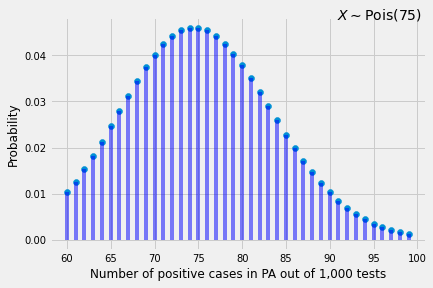

In [15]:
import scipy.stats 
fig, ax = plt.subplots()

poissonRVPMF = scipy.stats.poisson(75).pmf

domain = np.arange(60,100,1)

ax.scatter( domain, poissonRVPMF(domain) ) 
for x,y in zip(domain,poissonRVPMF(domain)):
    ax.plot( [x]*2, [0,y], color="b",alpha=0.5 )
ax.set_xlabel("Number of positive cases in PA out of 1,000 tests",fontsize=12)
ax.set_ylabel("Probability",fontsize=12)

ax.tick_params(which="both",labelsize=10)
ax.text(0.99,0.99,r"$X\sim \mathrm{Pois}(75)$",transform=ax.transAxes,ha="right")

## Sampling Distribution and Confidence intervals